In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
# Membaca data
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')
RFM_km = data.drop(["customer_id"], axis=1)

#Menampilkan 10 baris teratas
print(data.head(10))

   customer_id  frequency  recency     monetary
0        12346          1       48  27904840000
1        12347          2       40    423420000
2        12348          2       41    414092000
3        12350          1       33    119478000
4        12352          3        6    449984000
5        12356          1       48    809968000
6        12359          2       28    842749000
7        12361          1       10     67602000
8        12362          1       18    170512000
9        12365          2       14    226652000


In [5]:
# Standardisasi data
standard_scaler = StandardScaler()
RFM_standardized = standard_scaler.fit_transform(RFM_km)
RFM_standardized = pd.DataFrame(RFM_standardized)
RFM_standardized.columns = ["Frequency", "Monetary", "Recency"]
print(RFM_standardized.head())

   Frequency  Monetary    Recency
0  -0.431543  0.428749  24.173698
1   0.042280  0.131641   0.080011
2   0.042280  0.168780   0.071833
3  -0.431543 -0.128328  -0.186463
4   0.516102 -1.131065   0.103301


In [6]:
# Mengatur parameter k-Means
k_means4 = KMeans(n_clusters=4, random_state=0)
k_means5 = KMeans(n_clusters=5, random_state=0)

In [7]:
# Menjalankan algoritma k-means dengan jumlah cluster = 4
k_means4.fit(RFM_standardized)

KMeans(n_clusters=4, random_state=0)

In [8]:
# Pred menyimpan hasil prediksi label cluster untuk setiap data dengan jumlah cluster = 4
pred = k_means4.predict(RFM_standardized)

In [10]:
# Menggabungkan dataframe data dan hasil label clustering
RFM_labeled = pd.concat([RFM_standardized, pd.Series(pred).rename("cluster")], axis=1)
print(RFM_labeled.head())

   Frequency  Monetary    Recency  cluster
0  -0.431543  0.428749  24.173698        3
1   0.042280  0.131641   0.080011        1
2   0.042280  0.168780   0.071833        1
3  -0.431543 -0.128328  -0.186463        1
4   0.516102 -1.131065   0.103301        1


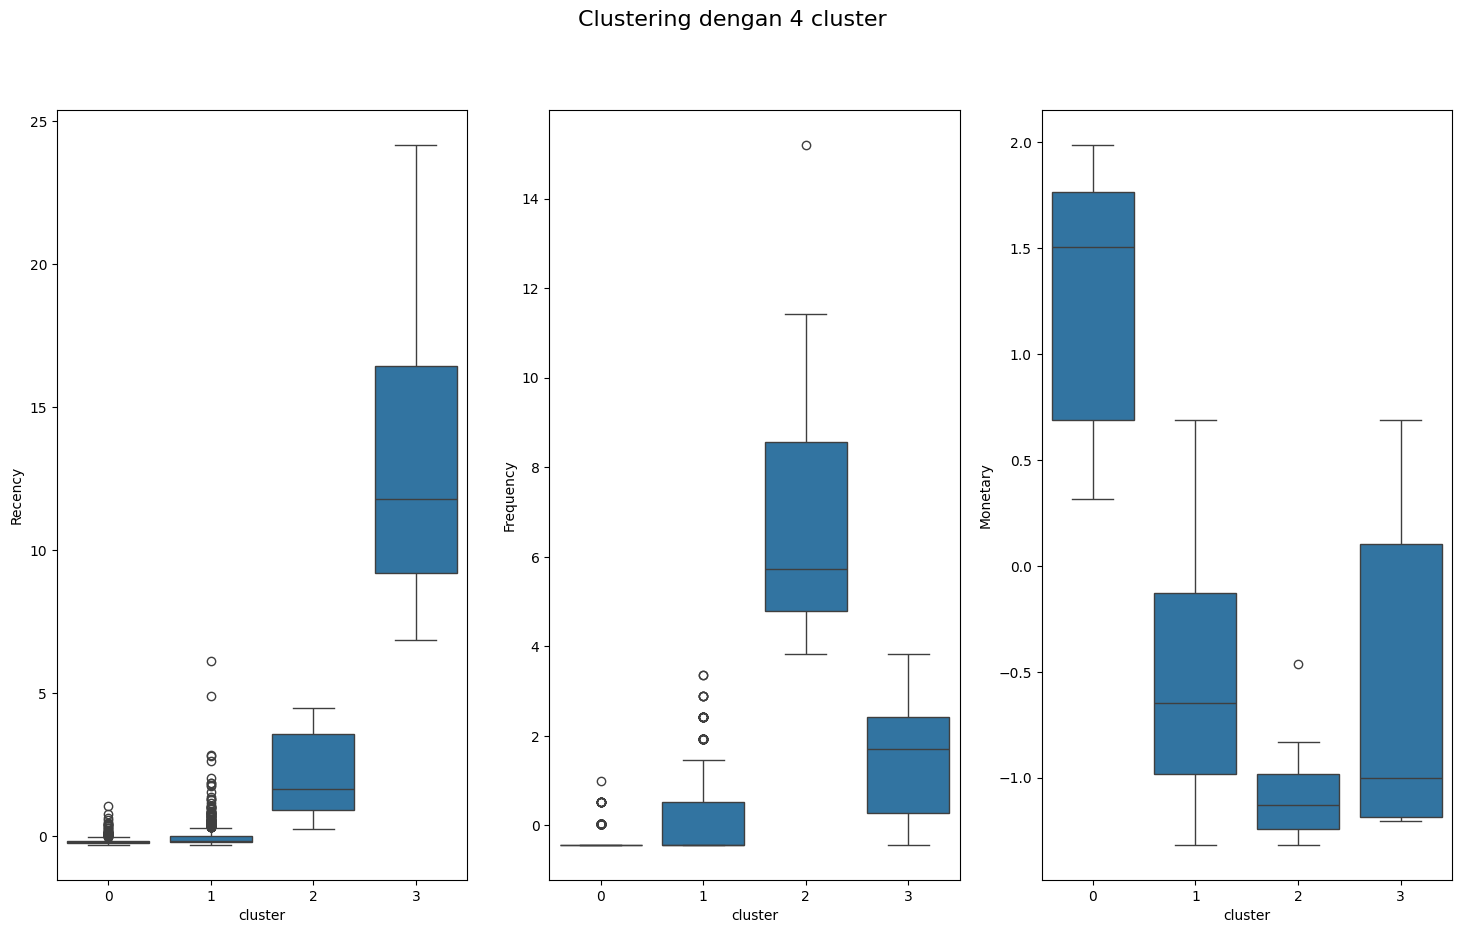

In [11]:
# Menampilkan hasil clustering untuk setiap data dalam bentuk boxplot
fig, ax = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(x="cluster", y="Recency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=RFM_labeled, ax=ax[2])
plt.suptitle("Clustering dengan 4 cluster", fontsize=16)
plt.show()

Hasil Analisis:
- Terdapat 514 konsumen pada cluster 0, konsumen melakukan transaksi akhir-akhir ini, tetapi frekuensi kedatangannya cukup rendah dibandingkan cluster 3. Total transaksi pada cluster ini tergolong rendah. Terdapat 1089 konsumen pada cluster 1, konsumen sudah lama tidak melakukan transaksi, frekuensi kedatangannya rendah, dan total transaksinya juga tergolong rendah.

- erdapat 17 konsumen pada cluster 2, konsumen melakukan transaksi akhir-akhir ini dan frekuensi kedatangannya cukup rendah dibandingkan cluster 0, 3, dan 4. Total transaksi pada cluster ini cukup tinggi dibandingkan dengan cluster 0,1, dan 2.

- erdapat 5 konsumen pada cluster 3, konsumen melakukan transaksi akhir-akhir ini, frekuensi kedatangannya lebih tinggi dibandingkan cluster 0, 1 dan 2. Total transaksi konsumen pada cluster ini paling tinggi dibandingkan cluster lainnya.

In [12]:
# Menjalankan algoritma k-means dengan jumlah cluster = 5
k_means5.fit(RFM_standardized)

KMeans(n_clusters=5, random_state=0)

In [13]:
# Pred menyimpan hasil prediksi label cluster untuk setiap data dengan jumlah cluster = 5
pred = k_means5.predict(RFM_standardized)

In [15]:
# Menggabungkan RFM dan hasil label clustering
RFM_labeled = pd.concat([RFM_standardized, pd.Series(pred).rename("cluster")], axis=1)
print(RFM_labeled.head())

   Frequency  Monetary    Recency  cluster
0  -0.431543  0.428749  24.173698        3
1   0.042280  0.131641   0.080011        1
2   0.042280  0.168780   0.071833        1
3  -0.431543 -0.128328  -0.186463        1
4   0.516102 -1.131065   0.103301        4


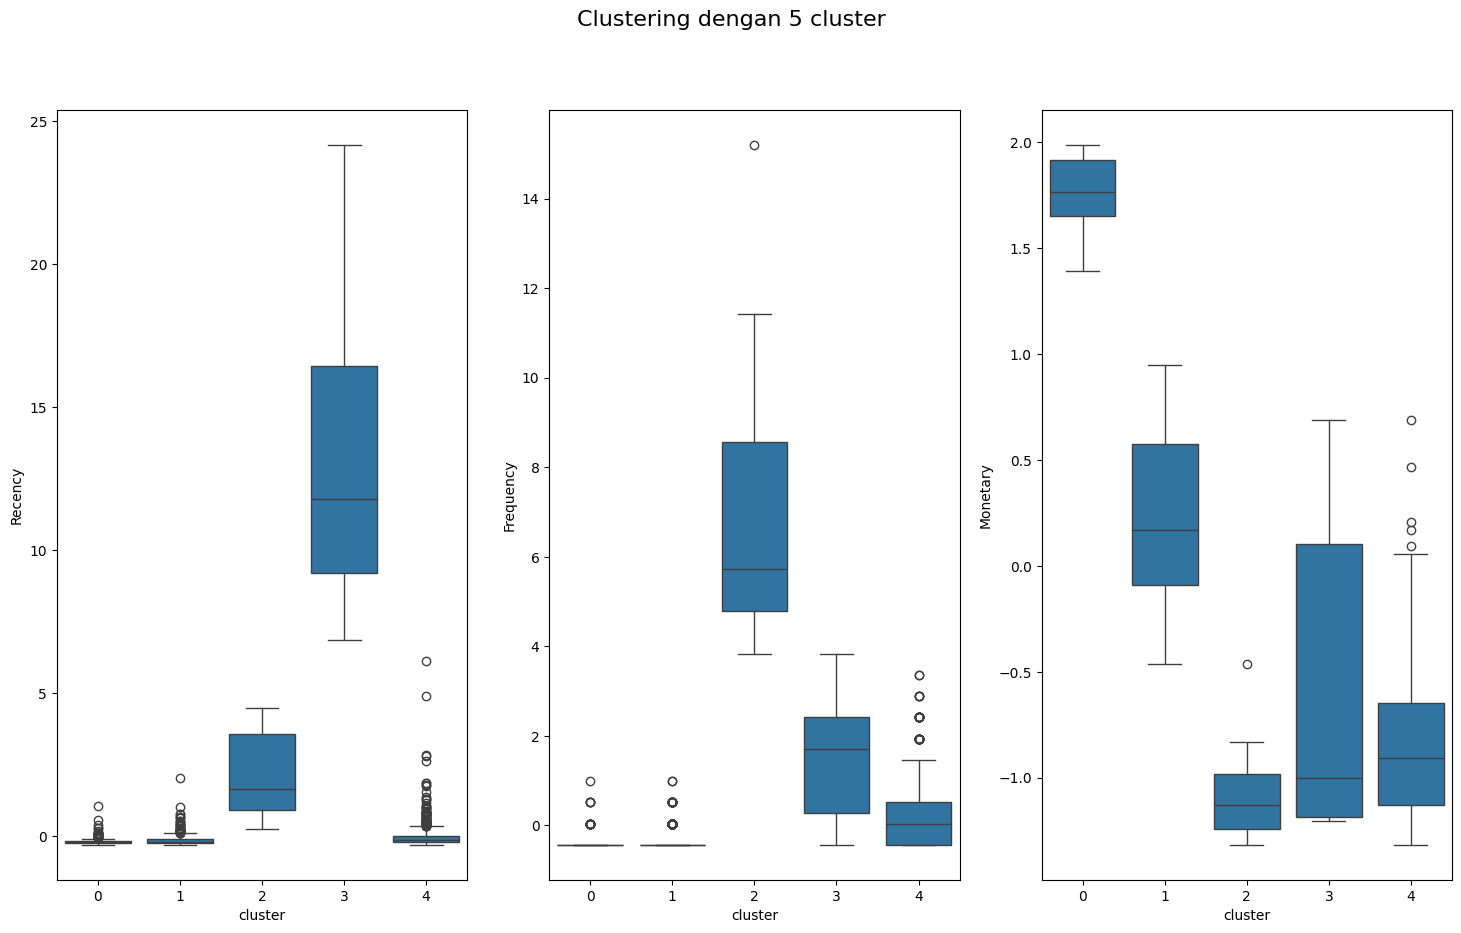

In [16]:
# Menampilkan hasil clustering untuk setiap data dalam bentuk boxplot
fig, ax = plt.subplots(1, 3, figsize=(18, 10))
sns.boxplot(x="cluster", y="Recency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=RFM_labeled, ax=ax[2])
plt.suptitle("Clustering dengan 5 cluster", fontsize=16)
plt.show()

Hasil Analisis:
- Terdapat 162 konsumen pada cluster 0, konsumen melakukan transaksi akhir-akhir ini, frekuensi kedatangannya cukup tinggi dibandingkan cluster 1 dan 3. Total transaksi lebih tinggi dari cluster 2 dan 4.

- Terdapat 952 konsumen pada cluster 1, konsumen melakukan transaksi akhir-akhir ini, frekuensi kedatangannya lebih tinggi daripada cluster 3, tetapi tidak lebih tinggi dibandingkan cluster lainnya. Total transaksinya lebih tinggi daripada cluster 0, 2, dan 4.

- Terdapat 14 konsumen pada cluster 2, konsumen melakukan transaksi akhir-akhir ini, frekuensi kedatangannya paling tinggi dibandingkan cluster lainnya, namun total transaksinya paling rendah dibandingkan cluster lainnya.

- Terdapat 492 konsumen pada cluster 3, konsumen melakukan transaksi akhir-akhir ini, frekuensi kedatangannya paling rendah, namun total transaksinya paling tinggi dibandingkan cluster lainnya.

- Terdapat 5 konsumen pada cluster 4, konsumen pada cluster ini sudah lama tidak melakukan transaksi, frekuensi kedatangannya cukup tinggi dibandingkan dengan cluster 1 dan 3, dan total transaksinya lebih tinggi daripada cluster 2 (tapi tidak lebih tinggi dari cluster 0, 1, dan 3.

